In [4]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [5]:
data = pd.read_csv('Catalogues/NGC1027_population1_lost.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,40.883954,60.977974,465599812376152448,0.9126,0.0491,2.594,-1.471,2.137,31,1.416,...,0.988,16.164633,16.862309,15.345198,1.517111,NaN,42.529206,40.883967,60.977964,0.941769
1,40.566852,61.112257,465613869810235776,0.8263,0.0889,2.683,-1.991,1.799,31,1.394,...,1.024,17.273977,18.071709,16.394646,1.677063,NaN,42.714595,40.566870,61.112249,0.857201
2,40.433807,61.163490,465617954318554112,0.9145,0.0899,2.822,-1.555,2.354,31,1.367,...,1.009,17.450153,18.343956,16.531420,1.812536,NaN,42.787732,40.433822,61.163480,0.946949
3,40.850411,61.341167,465625758279504768,0.8936,0.0867,2.857,-2.143,1.890,31,1.351,...,0.980,17.445694,18.397396,16.483128,1.914268,NaN,42.867205,40.850431,61.341158,0.927134
4,40.166289,61.316399,465646369819233152,0.9878,0.1105,2.838,-1.909,2.100,31,1.351,...,0.960,17.870052,18.870697,16.925976,1.944721,NaN,42.980211,40.166307,61.316390,1.016958
5,40.779472,61.534424,465676576334468352,0.9182,0.0615,2.506,-1.933,1.594,31,1.416,...,1.060,16.935408,17.629023,16.093990,1.535032,NaN,43.057305,40.779490,61.534417,0.947983
6,41.817304,61.440901,465709591742328576,0.9154,0.0584,2.538,-1.561,2.001,31,1.383,...,0.961,16.881020,17.703257,15.995484,1.707772,NaN,42.769777,41.817319,61.440892,0.946446
7,41.833071,61.542762,465712516619396352,0.8377,0.0966,2.599,-1.571,2.071,31,1.382,...,0.998,17.555767,18.418793,16.670725,1.748068,NaN,42.859911,41.833085,61.542753,0.868760
8,41.928675,61.655383,465713513051918976,0.8635,0.0696,2.773,-1.643,2.234,31,1.406,...,1.001,17.065365,17.796772,16.234787,1.561985,NaN,42.944533,41.928690,61.655373,0.893734
9,40.845117,61.838972,465778556039769856,0.9408,0.0538,2.783,-2.254,1.633,95,NaN,...,1.032,16.644726,17.326363,15.840570,1.485793,NaN,43.321820,40.845138,61.838965,0.971297


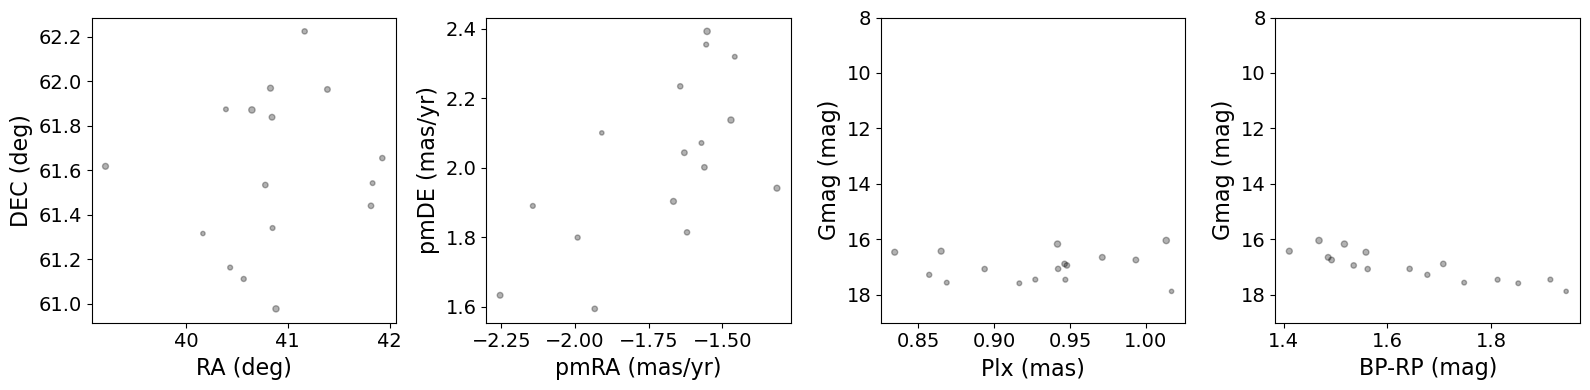

In [6]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)
